1) Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.

2) Figure out if any preprocessing such as scaling would help here

3) Draw elbow plot and from that figure out optimal value of k

In [54]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [80]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
df.drop(['sepal length (cm)','sepal width (cm)'], axis = 'columns', inplace = True)

In [41]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


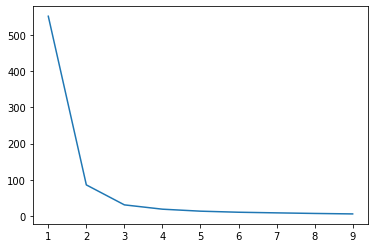

In [82]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(df)
    sse.append(km.inertia_)
    
plt.plot(k_rng,sse)

In [86]:
km = KMeans(n_clusters = 3)
y_predict = km.fit_predict(df)
df['Cluster'] = y_predict
df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


Text(0, 0.5, 'petal width (cm)')

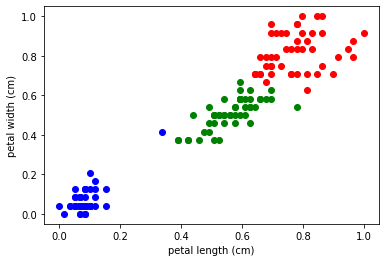

In [87]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'red')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

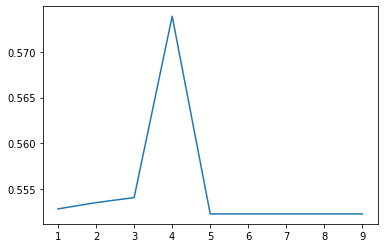

In [85]:
scaler = MinMaxScaler()
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
df.head()

k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans()
    km.fit(df)
    sse.append(km.inertia_)

plt.plot(k_rng,sse)